In [2]:
import os
import cv2
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('img_loc.csv')

In [6]:
df.sort_values(by=['latitude','longitude'], inplace=True)
df

,image_name,latitude,longitude
4,img5.jpg,39.999,-74.000
5,img6.jpg,39.999,-73.999
6,img7.jpg,39.999,-73.998
0,img1.jpg,40.000,-74.000
1,img2.jpg,40.000,-73.999
2,img3.jpg,40.000,-73.998
3,img4.jpg,40.000,-73.997


In [10]:
df = df.reset_index(drop=True)

In [11]:
df

,image_name,latitude,longitude
0,img5.jpg,39.999,-74.000
1,img6.jpg,39.999,-73.999
2,img7.jpg,39.999,-73.998
3,img1.jpg,40.000,-74.000
4,img2.jpg,40.000,-73.999
5,img3.jpg,40.000,-73.998
6,img4.jpg,40.000,-73.997


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def stitch_images(mask_image_path, map_csv, output_path):
    df = pd.read_csv(map_csv)
    df = df.sort_values(by=['latitude', 'longitude'])
    df = df.reset_index(drop=True)

    grouped = df.groupby('latitude')
    image_matrix = []

    max_row_width = 0  
    row_heights = []   

    for _, group in grouped:
        row_images = []
        max_height = 0
        max_width = 0

        imgs = []
        for _, row in group.iterrows():
            image_path = os.path.join(mask_image_path, row['image_name'])
            img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            if img is not None:
                imgs.append(img)
                max_height = max(max_height, img.shape[0])
                max_width += img.shape[1]
                # print(max_width)

        padded_row = []
        for img in imgs:
            h, w = img.shape[:2]
            # Pad image to match max height of the row
            if h < max_height:
                pad_height = max_height - h
                pad = np.zeros((pad_height, w, img.shape[2]) if img.ndim == 3 else (pad_height, w), dtype=img.dtype)
                img = np.vstack((img, pad))
            padded_row.append(img)

        if padded_row:
            row_img = np.hstack(padded_row)
            image_matrix.append(row_img)
            row_heights.append(max_height)
            max_row_width = max(max_row_width, row_img.shape[1])
    
    # Pad rows to match max_row_width
    for i in range(len(image_matrix)):
        row_img = image_matrix[i]
        h, w = row_img.shape[:2]
        if w < max_row_width:
            pad_width = max_row_width - w
            if row_img.ndim == 3:
                pad = np.zeros((h, pad_width, row_img.shape[2]), dtype=row_img.dtype)
            else:
                pad = np.zeros((h, pad_width), dtype=row_img.dtype)
            image_matrix[i] = np.hstack((row_img, pad))

    # Stack all rows vertically
    stitched_image = np.vstack(image_matrix)

    # Save result
    cv2.imwrite(output_path, stitched_image)


In [38]:
stitch_images(mask_image_path='mask_images', map_csv='img_loc.csv', output_path='stitched_output.jpg')

Stitched image saved to stitched_output.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hex_packed_seed_points(image_path, spacing=20, output_path="seed_output.png"):
    # Load and convert to RGB
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    green_mask = np.all(image_rgb == [255, 255, 255], axis=-1).astype(np.uint8)

    h, w = green_mask.shape
    seed_points = []

    row_height = int(spacing * np.sqrt(3) / 2)

    for row in range(0, h, row_height):
        offset = spacing // 2 if (row // row_height) % 2 == 1 else 0
        for col in range(offset, w, spacing):
            if row < h and col < w and green_mask[row, col] == 1:
                seed_points.append((col, row))


    output_img = image_rgb.copy()
    for (x, y) in seed_points:
        cv2.circle(output_img, (x, y), radius=2, color=(0, 0, 0), thickness=-1)

    # Save output image
    output_bgr = cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, output_bgr)
    print(f"Saved output with seed points to: {output_path}")

    return seed_points


Image dimensions: 2048x4096
Saved output with seed points to: seed_output.png


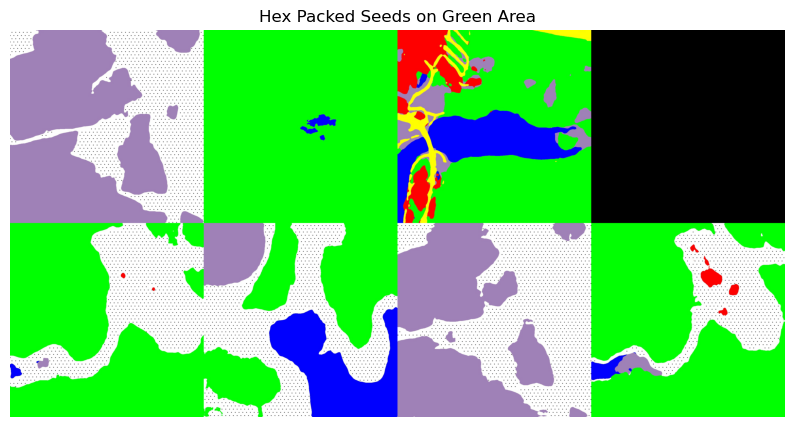

[(0, 0),
 (20, 0),
 (40, 0),
 (60, 0),
 (80, 0),
 (100, 0),
 (120, 0),
 (500, 0),
 (520, 0),
 (540, 0),
 (560, 0),
 (580, 0),
 (600, 0),
 (620, 0),
 (640, 0),
 (660, 0),
 (680, 0),
 (700, 0),
 (720, 0),
 (740, 0),
 (760, 0),
 (1020, 0),
 (10, 17),
 (30, 17),
 (50, 17),
 (70, 17),
 (90, 17),
 (110, 17),
 (530, 17),
 (550, 17),
 (570, 17),
 (590, 17),
 (610, 17),
 (630, 17),
 (650, 17),
 (670, 17),
 (690, 17),
 (710, 17),
 (730, 17),
 (750, 17),
 (1010, 17),
 (0, 34),
 (20, 34),
 (40, 34),
 (60, 34),
 (80, 34),
 (100, 34),
 (520, 34),
 (540, 34),
 (560, 34),
 (580, 34),
 (600, 34),
 (620, 34),
 (640, 34),
 (660, 34),
 (680, 34),
 (700, 34),
 (720, 34),
 (740, 34),
 (760, 34),
 (1020, 34),
 (10, 51),
 (30, 51),
 (50, 51),
 (70, 51),
 (90, 51),
 (110, 51),
 (530, 51),
 (550, 51),
 (570, 51),
 (590, 51),
 (610, 51),
 (630, 51),
 (650, 51),
 (670, 51),
 (690, 51),
 (710, 51),
 (730, 51),
 (750, 51),
 (770, 51),
 (1010, 51),
 (0, 68),
 (20, 68),
 (40, 68),
 (60, 68),
 (80, 68),
 (100, 68),
 (

In [12]:
hex_packed_seed_points(image_path='stitched_output.jpg', spacing=20, visualize=True)